In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import ttest_ind
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import feature_selection as fs
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import  catboost
from catboost import * 
from catboost import CatBoostClassifier, Pool, cv
from catboost import MetricVisualizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.ensemble import GradientBoostingClassifier as Gboost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score, roc_curve
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

## Sections ##

1. Problem definition


2. Loading data


3. Understanding the data


4. Distribution of variables

   4.1 Target
   
   4.2 Features
   
   4.2.1 Imputing
    

5. Data Preparation

    5.1.  Feature transformation
    
    5.2.  Feature Selection
    
    5.2.1. Performance with Full Set of Features
    
    5.3.  Balanced and split data
    
    5.4.  Recursive Feature Elimination with RFECV
    
    5.5.  Clusters and searching for outliers with DBSCAN
    

6. Algorithm Evaluation

    6.1. CatBoost 

    6.2. Logistic Regression

    6.3  SVC support vector classifier 
    

7. ROC AUC metric for KNeighborsClassifier, Decision Tree, RandomForestClassifier, GBoost, LinearDiscriminantAnalysis, LGBMClassifier, AdaboostClassifier models with default settings


8. Result Presentation


9. Resources







  # 1. Problem definition #

One of the key tasks of the bank is to be able to determine to whom it can extend credit and to whom it cannot. Historically, it has been proven that a large part of the bank's profit is formed precisely from the service of providing credits. Every single bank follows the Basel Committee on Banking Supervision regulations. In case of delay or non-return of credit, it is obliged to freeze part of its assets, thereby depriving itself of the opportunity to invest them and receive a profit.

 Banks as a conservative institution adhere to models that are interpretable, I will use a large number of models that are black boxes, but can be used as auxiliary for the bank to make the right decision, on such an important issue as credit scoring.

# 2. Loading data #

In [3]:
df_2 = pd.read_csv('dataset_credit_scoring.csv')
df_2.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df_2.shape

(5960, 13)

# 3. Understanding the data #

In [5]:
df_2.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [6]:
df_2.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

# 4. Distribution of variables # 

## 4.1 Target ##

0    4771
1    1189
Name: BAD, dtype: int64


<AxesSubplot:>

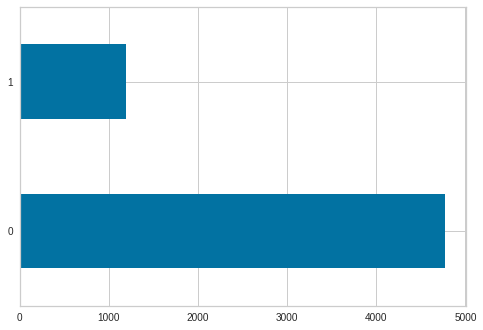

In [7]:
print(df_2['BAD'].value_counts())
df_2['BAD'].value_counts().plot.barh()

In [8]:
df_2.BAD.value_counts()/len(df_2) * 100 
# 1 = client defaulted on loan; 0 = loan repaid
# zeroes are about 80% and ones are about 20%
# The target class is an unbalanced 

0    80.050336
1    19.949664
Name: BAD, dtype: float64

## 4.2 Features ##

<AxesSubplot:ylabel='Frequency'>

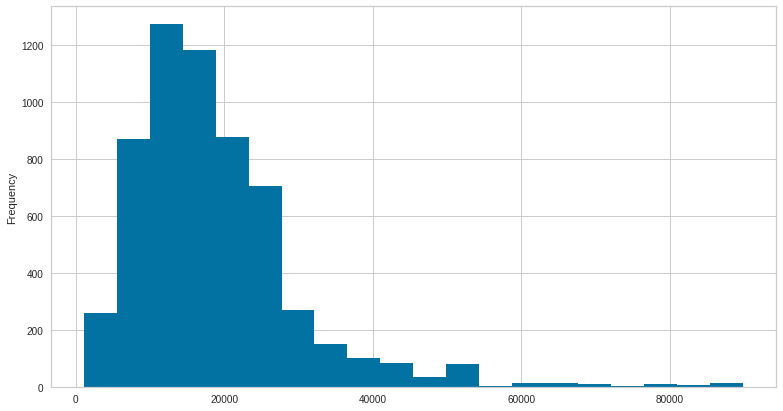

In [9]:
df_2["LOAN"].plot.hist(bins = 20, figsize=(13, 7)) # high destiny 10000 - 30000, we can cap off values >= 60000

<AxesSubplot:ylabel='Frequency'>

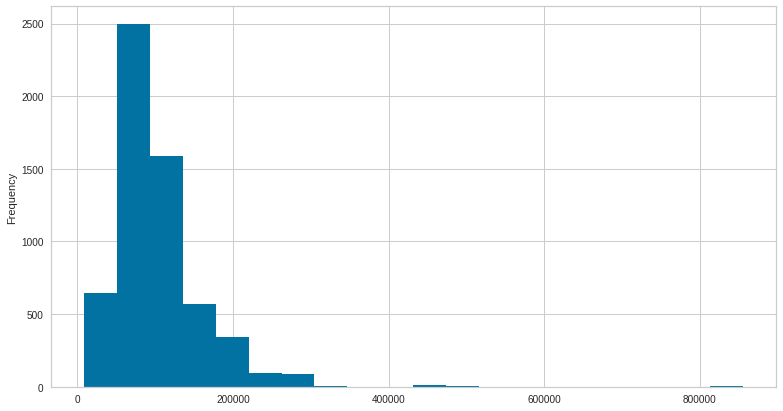

In [10]:
df_2["VALUE"].plot.hist(bins = 20, figsize=(13, 7)) # high destiny 80000 - 100000, we can cap off values >= 40000

<AxesSubplot:ylabel='Frequency'>

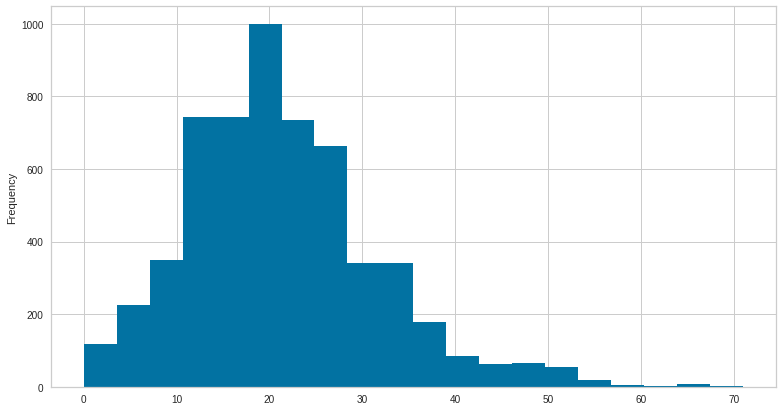

In [11]:
df_2["CLNO"].plot.hist(bins = 20, figsize=(13, 7)) # good distribution no need to modify

<AxesSubplot:ylabel='Frequency'>

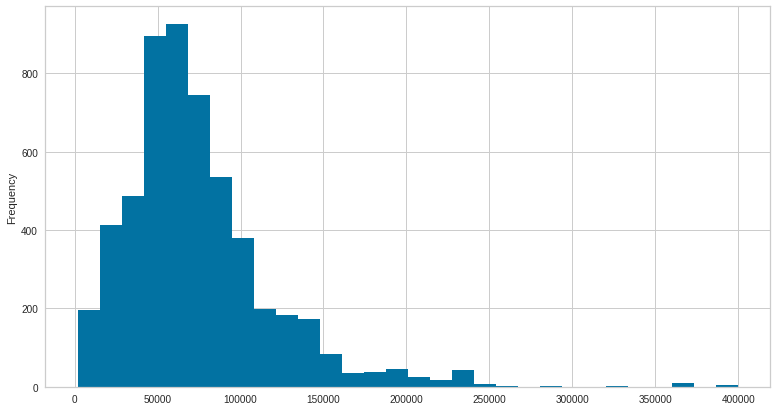

In [12]:
df_2["MORTDUE"].plot.hist(bins = 30, figsize=(13, 7))# high population around 50000 - 100000, the values > = 300000 can be cap off

<AxesSubplot:ylabel='Frequency'>

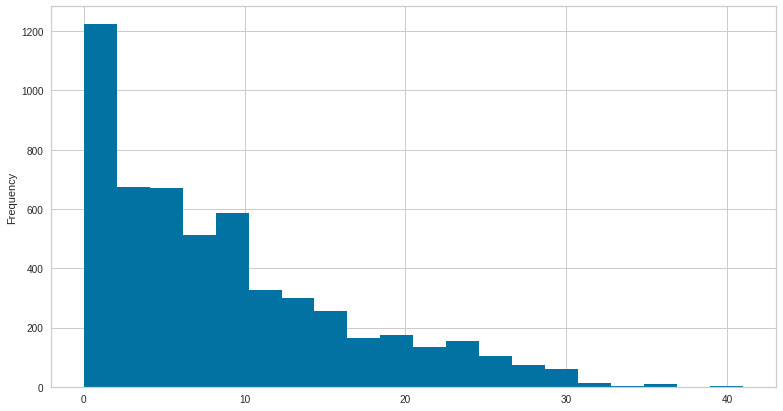

In [13]:
df_2["YOJ"].plot.hist(bins = 20, figsize=(13, 7))# Good idea here is to modify this variable to decrease the skewness

<AxesSubplot:ylabel='Frequency'>

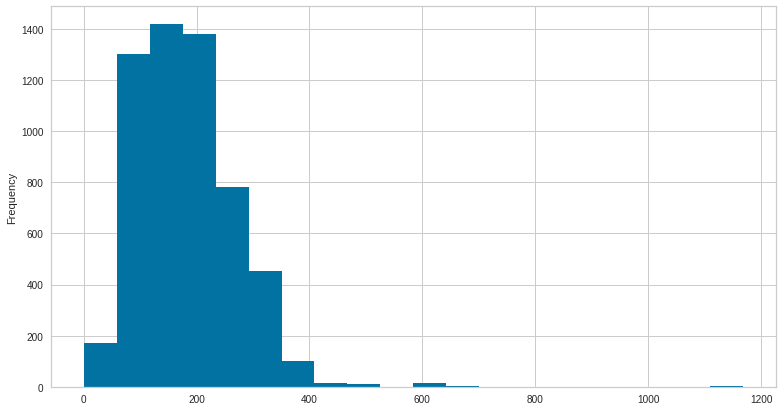

In [14]:
df_2["CLAGE"].plot.hist(bins = 20, figsize=(13, 7)) # Denisty is high around 100  - 300, values >= 600 can cap off

<AxesSubplot:ylabel='Frequency'>

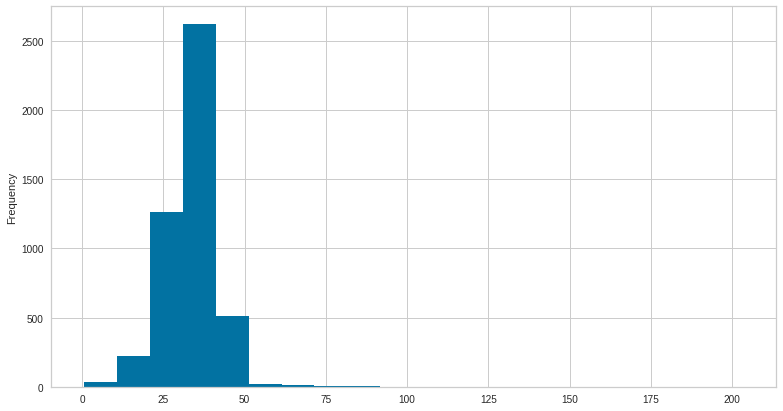

In [15]:
df_2["DEBTINC"].plot.hist(bins = 20, figsize=(13, 7)) # Denisty is high around 25  - 50, values >= 100 can cap off

JOB and REASON must be modified (for logistic regression)
For imputing the missing values in case of nominal features, replacing them with majority class (first replacing values), in case of other numerical inputs, we can replace them by median

In [16]:
print(df_2["JOB"].value_counts())

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


In [17]:
df_2["JOB"].replace(['Other', 'ProfExe','Office','Mgr', 'Self', 'Sales' ], [0, 1, 2, 3, 4, 5], inplace=True)#replacing values

In [18]:
print(df_2["REASON"].value_counts())

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64


In [19]:
df_2["REASON"].replace(['DebtCon', 'HomeImp'], [0, 1], inplace=True) #replacing values

In [20]:
df_2["DELINQ"].value_counts() #binary variable would be  useful

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

In [21]:
df_2["DEROG"].value_counts() # derogatory incidents were reported only in a few cases, we can create binary variable

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [22]:
df_2["NINQ"].value_counts() #distributed mostly among first 5  values

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: NINQ, dtype: int64

Distributions are fine, YOJ  is higly skewed

## 4.2.1 Imputing ##

In [23]:
df_2.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [24]:
df_2["REASON"].fillna(value = 0, inplace = True) # replacement using majority class in case of REASON variable is 0

In [25]:
df_2["JOB"].fillna(value = 0, inplace = True) # replacement using majority class

In [26]:
df_2["DEROG"].fillna(value = 0, inplace = True)

In [27]:
df_2["DELINQ"].fillna(value = 0, inplace = True)

In [28]:
df_2.fillna(value = df_2.median(numeric_only=True), inplace = True)

In [29]:
df_2.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# 5. Data Preparation #

## 5.1 Feature transformation ##

As we mentioned in section 4.2 Features we need to transform some variables to improve predictability

In [30]:
df_2.loc[df_2["CLAGE"]>=600, "CLAGE"] = 600
df_2.loc[df_2["VALUE"]>=40000, "VALUE"] = 40000
df_2.loc[df_2["MORTDUE"]>=300000, "MORTDUE"] = 300000
df_2.loc[df_2["DEBTINC"]>=100, "DEBTINC"] = 100

decrease the skewness of YOJ

In [31]:
df_2["YOJ"] = df_2["YOJ"].apply(lambda x: np.log(x+1))

<AxesSubplot:ylabel='Frequency'>

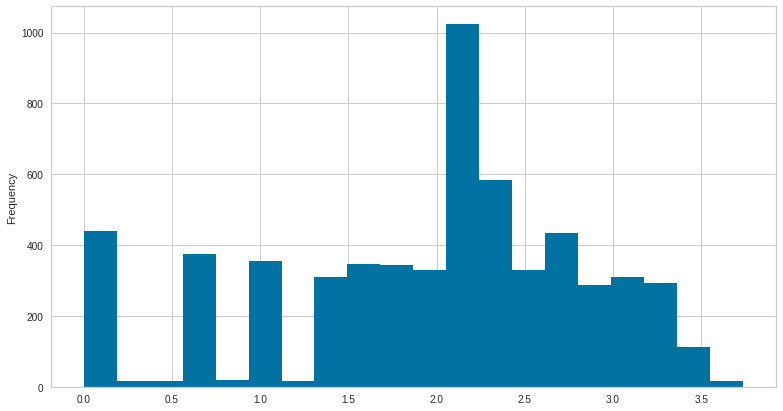

In [32]:
df_2["YOJ"].plot.hist(bins = 20, figsize=(13, 7))

In [33]:
df_2["B_DEROG"] = (df_2["DEROG"]>=1)*1
df_2["B_DELINQ"] = (df_2["DELINQ"]>=1)*1

 ## 5.2 Feature Selection ##

Find features with correlation > 0.75 and delete them 

In [34]:
cor = df_2.corr()

In [35]:
all_features = list(cor.columns)
features_to_del = []
for i in cor.columns:
    if i == 'BAD':
        continue
    for j in cor.index:
        if all_features.index(j) >= all_features.index(i) or j == 'BAD':
            continue
        else:
            if abs(cor.loc[i,j]) > 0.75:
                if abs(cor.loc['BAD', i]) > abs(cor.loc['BAD', j]):
                    features_to_del.append(j)
                else:
                    features_to_del.append(i)

In [36]:
features_to_del = set(features_to_del)

In [37]:
for i in features_to_del:
    del df_2[i]
df_2.shape

(5960, 14)

we can't find features with correlation above 0.75 and will contunue with Performance with Full Set of Features

## 5.2.1 Performance with Full Set of Features ##

Split the dataset columns into X and y(target) then we normalize each descriptive feature in X to be between 0 and 1

In [38]:
X = df_2.drop('BAD', axis = 1)
y = df_2['BAD']

In [39]:
X = preprocessing.MinMaxScaler().fit_transform(X)

In [40]:
rfc = RandomForestClassifier(n_estimators=20, random_state=22) #As wrapper, we use the RandomForestClassifier.

In [41]:
cv_method = RepeatedStratifiedKFold(n_splits=5, #For assessment, we shall use stratified 5-fold cross-validation with 3 repetitions.
                                     n_repeats=3,
                                     random_state=22)

In [42]:
scoring_metric = 'roc_auc'  

In [43]:
cv_results_full = cross_val_score(estimator=rfc,
                             X=X,
                             y=y, 
                             cv=cv_method, 
                             scoring=scoring_metric)

In [44]:
cv_results_full.mean().round(3) #compute the average cross-validation performance as the mean of the cv_results_full array.

0.952

## 5.3. Balanced and split data ##

In [45]:
ros = RandomOverSampler() # we balanced dataset
X_ros, y_ros = ros.fit_resample(X, y)
print(Counter(y_ros))

Counter({1: 4771, 0: 4771})


Now we are ready to split data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, shuffle = True, random_state = 22, stratify = y_ros)

In [47]:
print(X_train.shape, X_test.shape)

(7633, 13) (1909, 13)


In [48]:
print(y_train.shape, y_test.shape)

(7633,) (1909,)


Let's check how similar are X_test and X_ros

In [49]:
test_mean = np.mean(X_test, axis = 0)
pred_mean = np.mean(X_ros, axis = 0)
print(len(test_mean), len(pred_mean))

13 13


In [50]:
ttest_ind(test_mean, pred_mean)

Ttest_indResult(statistic=0.0003026119918875537, pvalue=0.9997610518930324)

## 5.4 Recursive Feature Elimination with RFECV

In [52]:
rfecv = RFECV(estimator= rfc, step = 1, cv = 3, scoring="roc_auc") 
rfecv = rfecv.fit(X_train, y_train)

print("The optimal number of features:", rfecv.n_features_)
#print("Best features:", X_train.columns[rfecv.support_].values)

for i in range(X_train.shape[1]):
    
	print(f'Column: {i}, Selected {rfecv.support_[i]}, Rank: {rfecv.ranking_[i]}') 

The optimal number of features: 12
Column: 0, Selected True, Rank: 1
Column: 1, Selected True, Rank: 1
Column: 2, Selected False, Rank: 2
Column: 3, Selected True, Rank: 1
Column: 4, Selected True, Rank: 1
Column: 5, Selected True, Rank: 1
Column: 6, Selected True, Rank: 1
Column: 7, Selected True, Rank: 1
Column: 8, Selected True, Rank: 1
Column: 9, Selected True, Rank: 1
Column: 10, Selected True, Rank: 1
Column: 11, Selected True, Rank: 1
Column: 12, Selected True, Rank: 1


now we ready to select our features

In [53]:
sel_ = RFECV(
    rfc,
    min_features_to_select=13,
    step=2,
)

sel_.fit(X_train, y_train)

X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)

## 5.5. Clusters and searching for outliers with DBSCAN ##

Although we have looked at all the variables and tried to remove the outlying values. Now we will try using elbow method for KMeans clustering to find out how many clusters form in our dataset and with DBSCAN to find out if there are any outliers left.

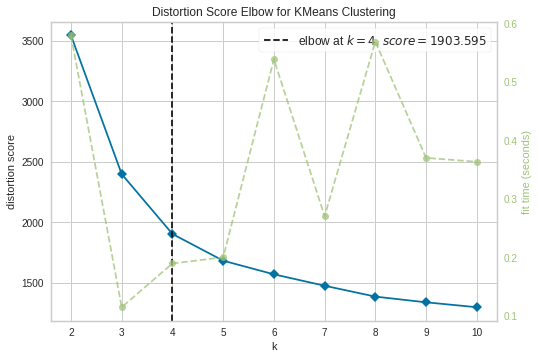

In [54]:
model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model)

visualizer.fit(X_train_selected) 
visualizer.show()
plt.show()

In [55]:
scala = StandardScaler()
df_2_scaled = scala.fit_transform(X_train_selected)

In [56]:
outlier_percent = []

for eps in np.linspace(0.001, 5, 100):
    
    dbscan = DBSCAN(eps=eps, min_samples = 26) # a good 'min_samples' number is two times the number of features
    dbscan.fit(df_2_scaled)
    perc_outliers = 100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

Text(0, 0.5, 'Percentage of Points Classified as Outliers')

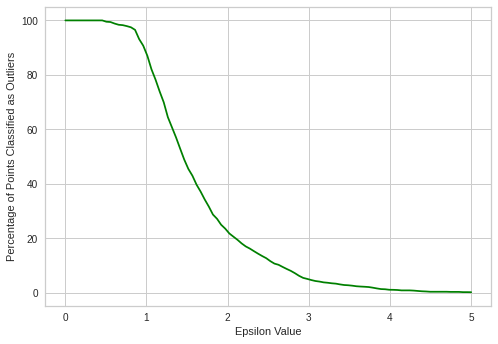

In [57]:
sns.lineplot(x=np.linspace(0.001, 5, 100), y=outlier_percent, color='green')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Points Classified as Outliers')

In [58]:
dend = linkage(df_2_scaled, method = "ward")
dend

array([[3.00000000e+00, 2.01600000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+00, 2.00000000e+03, 0.00000000e+00, 2.00000000e+00],
       [6.00000000e+00, 1.58600000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.52520000e+04, 1.52600000e+04, 9.52387353e+01, 5.30100000e+03],
       [1.52510000e+04, 1.52620000e+04, 1.09260663e+02, 5.56800000e+03],
       [1.52610000e+04, 1.52630000e+04, 1.47938929e+02, 7.63300000e+03]])

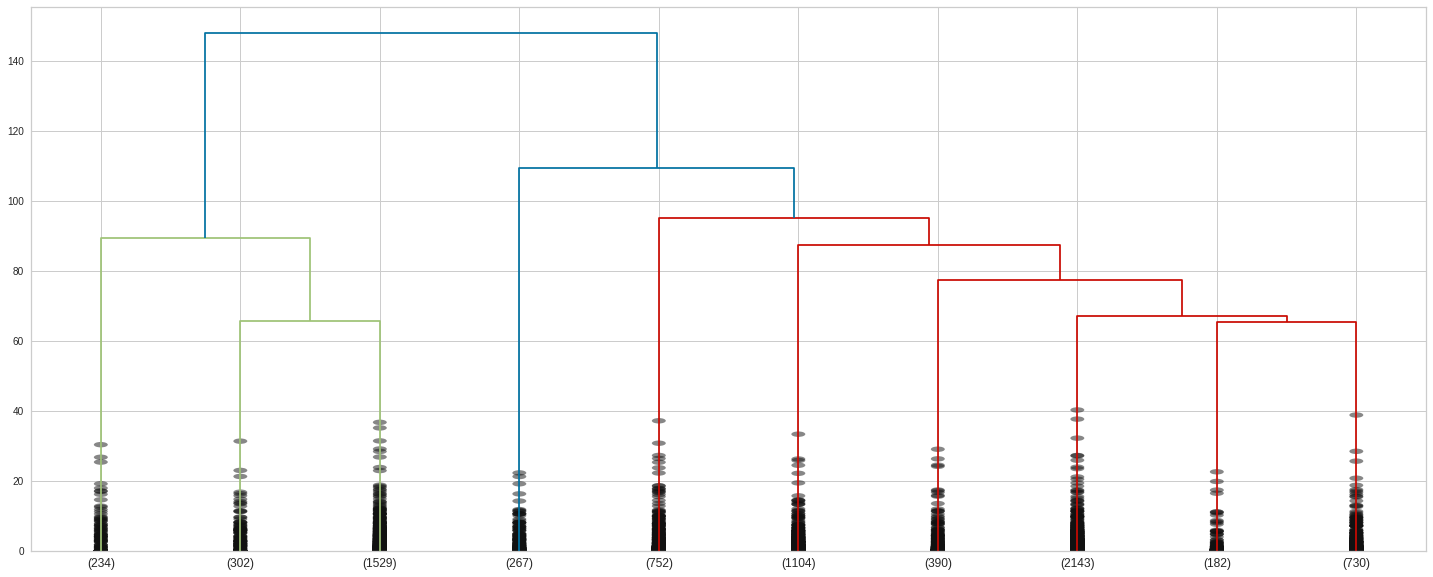

In [59]:
plt.figure(figsize = (25,10))
dendr = dendrogram(dend, truncate_mode="lastp", p = 10, show_leaf_counts = True, show_contracted = True)

In [60]:
df_2_for_clust = preprocessing.normalize(X_train_selected)
df_2_for_clust

array([[0.04235595, 0.16557654, 0.78358502, ..., 0.22072818, 0.25410499,
        0.        ],
       [0.20723998, 0.09969502, 0.67409927, ..., 0.19938148, 0.22528278,
        0.        ],
       [0.15283861, 0.28012545, 0.77114024, ..., 0.15205582, 0.23278088,
        0.        ],
       ...,
       [0.06317022, 0.12476159, 0.55539756, ..., 0.17991752, 0.23804438,
        0.55539756],
       [0.23213278, 0.23336419, 0.42154173, ..., 0.14249298, 0.14532475,
        0.42154173],
       [0.16027738, 0.21498524, 0.74516393, ..., 0.157429  , 0.29508611,
        0.        ]])

In [61]:
clusters = DBSCAN(eps = 2.5, min_samples = 26).fit_predict(df_2_for_clust) # I checked with eps 2, 3 the same result, zero outliers

In [62]:
list(clusters).count(-1) # show us how many outliers in the dataset

0

# 6. Algorithm Evaluation #

## 6.1 CatBoost ##

I am planning to start with CatBoost. It's an improved implementation of Gradient Boosting Decision Trees (GBDT). CatBoost solves the problem of Gradient Bias and Prediction Shift, this allows you to reduce the likelihood of overfitting and improve the accuracy of the algorithm.

In [63]:
CBC = CatBoostClassifier()

parameters = {'depth'         : [5,6,7,8,9,10,11],
                'learning_rate' : [0.01,0.02,0.03,0.04],
                'iterations'    : [50, 150, 300, 500]
                 }

Rand_CBC = RandomizedSearchCV(estimator=CBC, param_distributions = parameters, cv = 3, n_jobs=-1, random_state = 22)
#cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
#n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.
Rand_CBC.fit(X_train_selected, y_train)

0:	learn: 0.6786046	total: 216ms	remaining: 1m 47s
1:	learn: 0.6651128	total: 253ms	remaining: 1m 2s
2:	learn: 0.6499003	total: 286ms	remaining: 47.3s
3:	learn: 0.6370294	total: 311ms	remaining: 38.6s
4:	learn: 0.6245006	total: 349ms	remaining: 34.6s
5:	learn: 0.6125404	total: 388ms	remaining: 31.9s
6:	learn: 0.6024858	total: 424ms	remaining: 29.9s
7:	learn: 0.5911923	total: 461ms	remaining: 28.3s
8:	learn: 0.5813960	total: 495ms	remaining: 27s
9:	learn: 0.5718251	total: 536ms	remaining: 26.3s
10:	learn: 0.5611216	total: 570ms	remaining: 25.4s
11:	learn: 0.5520802	total: 606ms	remaining: 24.7s
12:	learn: 0.5425788	total: 660ms	remaining: 24.7s
13:	learn: 0.5350003	total: 701ms	remaining: 24.3s
14:	learn: 0.5268683	total: 732ms	remaining: 23.7s
15:	learn: 0.5197963	total: 769ms	remaining: 23.3s
16:	learn: 0.5119532	total: 805ms	remaining: 22.9s
17:	learn: 0.5052882	total: 841ms	remaining: 22.5s
18:	learn: 0.4981065	total: 877ms	remaining: 22.2s
19:	learn: 0.4910134	total: 913ms	remainin

160:	learn: 0.2363504	total: 6.28s	remaining: 13.2s
161:	learn: 0.2357393	total: 6.31s	remaining: 13.2s
162:	learn: 0.2350349	total: 6.35s	remaining: 13.1s
163:	learn: 0.2344442	total: 6.39s	remaining: 13.1s
164:	learn: 0.2339836	total: 6.43s	remaining: 13.1s
165:	learn: 0.2327559	total: 6.47s	remaining: 13s
166:	learn: 0.2323374	total: 6.5s	remaining: 13s
167:	learn: 0.2318869	total: 6.54s	remaining: 12.9s
168:	learn: 0.2313379	total: 6.6s	remaining: 12.9s
169:	learn: 0.2304961	total: 6.66s	remaining: 12.9s
170:	learn: 0.2300590	total: 6.71s	remaining: 12.9s
171:	learn: 0.2281874	total: 6.77s	remaining: 12.9s
172:	learn: 0.2277143	total: 6.83s	remaining: 12.9s
173:	learn: 0.2270563	total: 6.88s	remaining: 12.9s
174:	learn: 0.2260846	total: 6.92s	remaining: 12.9s
175:	learn: 0.2256823	total: 6.96s	remaining: 12.8s
176:	learn: 0.2249396	total: 7s	remaining: 12.8s
177:	learn: 0.2246087	total: 7.04s	remaining: 12.7s
178:	learn: 0.2240070	total: 7.07s	remaining: 12.7s
179:	learn: 0.2235113

318:	learn: 0.1537802	total: 12.8s	remaining: 7.24s
319:	learn: 0.1529377	total: 12.8s	remaining: 7.19s
320:	learn: 0.1525817	total: 12.8s	remaining: 7.15s
321:	learn: 0.1522000	total: 12.8s	remaining: 7.1s
322:	learn: 0.1519523	total: 12.9s	remaining: 7.06s
323:	learn: 0.1517454	total: 12.9s	remaining: 7.01s
324:	learn: 0.1509993	total: 13s	remaining: 6.97s
325:	learn: 0.1507048	total: 13s	remaining: 6.95s
326:	learn: 0.1501194	total: 13.1s	remaining: 6.91s
327:	learn: 0.1496712	total: 13.1s	remaining: 6.88s
328:	learn: 0.1491287	total: 13.2s	remaining: 6.84s
329:	learn: 0.1487480	total: 13.2s	remaining: 6.8s
330:	learn: 0.1483325	total: 13.2s	remaining: 6.76s
331:	learn: 0.1479929	total: 13.3s	remaining: 6.71s
332:	learn: 0.1476180	total: 13.3s	remaining: 6.67s
333:	learn: 0.1472209	total: 13.3s	remaining: 6.63s
334:	learn: 0.1469067	total: 13.4s	remaining: 6.59s
335:	learn: 0.1465611	total: 13.4s	remaining: 6.55s
336:	learn: 0.1461597	total: 13.4s	remaining: 6.5s
337:	learn: 0.14586

476:	learn: 0.1015767	total: 18.9s	remaining: 910ms
477:	learn: 0.1013594	total: 18.9s	remaining: 871ms
478:	learn: 0.1012123	total: 19s	remaining: 832ms
479:	learn: 0.1010036	total: 19s	remaining: 793ms
480:	learn: 0.1007991	total: 19.1s	remaining: 754ms
481:	learn: 0.1006169	total: 19.1s	remaining: 714ms
482:	learn: 0.1002421	total: 19.2s	remaining: 675ms
483:	learn: 0.0999898	total: 19.2s	remaining: 635ms
484:	learn: 0.0998213	total: 19.2s	remaining: 595ms
485:	learn: 0.0995396	total: 19.3s	remaining: 556ms
486:	learn: 0.0993589	total: 19.3s	remaining: 516ms
487:	learn: 0.0992281	total: 19.4s	remaining: 476ms
488:	learn: 0.0989778	total: 19.4s	remaining: 436ms
489:	learn: 0.0985858	total: 19.4s	remaining: 397ms
490:	learn: 0.0984350	total: 19.5s	remaining: 357ms
491:	learn: 0.0981381	total: 19.5s	remaining: 318ms
492:	learn: 0.0979529	total: 19.6s	remaining: 278ms
493:	learn: 0.0976634	total: 19.6s	remaining: 238ms
494:	learn: 0.0974670	total: 19.6s	remaining: 198ms
495:	learn: 0.09

476:	learn: 0.1026468	total: 18.7s	remaining: 904ms
477:	learn: 0.1022863	total: 18.8s	remaining: 864ms
478:	learn: 0.1021155	total: 18.8s	remaining: 825ms
479:	learn: 0.1019577	total: 18.9s	remaining: 786ms
480:	learn: 0.1016836	total: 18.9s	remaining: 747ms
481:	learn: 0.1014541	total: 18.9s	remaining: 707ms
482:	learn: 0.1011097	total: 19s	remaining: 668ms
483:	learn: 0.1007810	total: 19s	remaining: 629ms
484:	learn: 0.1005564	total: 19.1s	remaining: 589ms
485:	learn: 0.1003436	total: 19.1s	remaining: 551ms
486:	learn: 0.1001463	total: 19.1s	remaining: 511ms
487:	learn: 0.0999158	total: 19.2s	remaining: 472ms
488:	learn: 0.0997513	total: 19.2s	remaining: 432ms
489:	learn: 0.0993743	total: 19.2s	remaining: 393ms
490:	learn: 0.0990986	total: 19.3s	remaining: 353ms
491:	learn: 0.0989526	total: 19.3s	remaining: 314ms
492:	learn: 0.0987857	total: 19.4s	remaining: 275ms
493:	learn: 0.0986300	total: 19.4s	remaining: 236ms
494:	learn: 0.0985050	total: 19.4s	remaining: 196ms
495:	learn: 0.09

303:	learn: 0.1821378	total: 4.15s	remaining: 2.68s
304:	learn: 0.1816642	total: 4.16s	remaining: 2.66s
305:	learn: 0.1810673	total: 4.17s	remaining: 2.64s
306:	learn: 0.1808621	total: 4.18s	remaining: 2.63s
307:	learn: 0.1804725	total: 4.2s	remaining: 2.62s
308:	learn: 0.1799508	total: 4.23s	remaining: 2.62s
309:	learn: 0.1795208	total: 4.25s	remaining: 2.6s
310:	learn: 0.1793455	total: 4.27s	remaining: 2.6s
311:	learn: 0.1788496	total: 4.3s	remaining: 2.59s
312:	learn: 0.1785627	total: 4.32s	remaining: 2.58s
313:	learn: 0.1780469	total: 4.34s	remaining: 2.57s
314:	learn: 0.1776457	total: 4.37s	remaining: 2.57s
315:	learn: 0.1769192	total: 4.39s	remaining: 2.56s
316:	learn: 0.1764301	total: 4.42s	remaining: 2.55s
317:	learn: 0.1758598	total: 4.44s	remaining: 2.54s
318:	learn: 0.1755406	total: 4.47s	remaining: 2.53s
319:	learn: 0.1750294	total: 4.48s	remaining: 2.52s
320:	learn: 0.1745510	total: 4.51s	remaining: 2.51s
321:	learn: 0.1742868	total: 4.53s	remaining: 2.5s
322:	learn: 0.173

461:	learn: 0.1310865	total: 6.35s	remaining: 522ms
462:	learn: 0.1309405	total: 6.36s	remaining: 508ms
463:	learn: 0.1307247	total: 6.37s	remaining: 494ms
464:	learn: 0.1303818	total: 6.38s	remaining: 480ms
465:	learn: 0.1300109	total: 6.39s	remaining: 467ms
466:	learn: 0.1298353	total: 6.41s	remaining: 453ms
467:	learn: 0.1295956	total: 6.42s	remaining: 439ms
468:	learn: 0.1292064	total: 6.43s	remaining: 425ms
469:	learn: 0.1290200	total: 6.44s	remaining: 411ms
470:	learn: 0.1286768	total: 6.46s	remaining: 397ms
471:	learn: 0.1284728	total: 6.47s	remaining: 384ms
472:	learn: 0.1283041	total: 6.48s	remaining: 370ms
473:	learn: 0.1279386	total: 6.5s	remaining: 356ms
474:	learn: 0.1276849	total: 6.51s	remaining: 343ms
475:	learn: 0.1274638	total: 6.52s	remaining: 329ms
476:	learn: 0.1270975	total: 6.53s	remaining: 315ms
477:	learn: 0.1268726	total: 6.54s	remaining: 301ms
478:	learn: 0.1266459	total: 6.57s	remaining: 288ms
479:	learn: 0.1263773	total: 6.59s	remaining: 275ms
480:	learn: 0

278:	learn: 0.2006638	total: 3.65s	remaining: 2.89s
279:	learn: 0.1998066	total: 3.67s	remaining: 2.88s
280:	learn: 0.1993581	total: 3.68s	remaining: 2.87s
281:	learn: 0.1987461	total: 3.69s	remaining: 2.85s
282:	learn: 0.1982915	total: 3.71s	remaining: 2.84s
283:	learn: 0.1979416	total: 3.72s	remaining: 2.83s
284:	learn: 0.1976663	total: 3.73s	remaining: 2.81s
285:	learn: 0.1972260	total: 3.74s	remaining: 2.8s
286:	learn: 0.1966369	total: 3.75s	remaining: 2.79s
287:	learn: 0.1961757	total: 3.77s	remaining: 2.77s
288:	learn: 0.1956381	total: 3.78s	remaining: 2.76s
289:	learn: 0.1952735	total: 3.8s	remaining: 2.75s
290:	learn: 0.1948831	total: 3.81s	remaining: 2.73s
291:	learn: 0.1945099	total: 3.82s	remaining: 2.72s
292:	learn: 0.1939390	total: 3.83s	remaining: 2.71s
293:	learn: 0.1934671	total: 3.85s	remaining: 2.69s
294:	learn: 0.1930521	total: 3.86s	remaining: 2.68s
295:	learn: 0.1927469	total: 3.88s	remaining: 2.67s
296:	learn: 0.1923944	total: 3.89s	remaining: 2.66s
297:	learn: 0.

436:	learn: 0.1416389	total: 5.68s	remaining: 818ms
437:	learn: 0.1412107	total: 5.69s	remaining: 806ms
438:	learn: 0.1409011	total: 5.7s	remaining: 792ms
439:	learn: 0.1406665	total: 5.72s	remaining: 780ms
440:	learn: 0.1404193	total: 5.73s	remaining: 767ms
441:	learn: 0.1402365	total: 5.74s	remaining: 753ms
442:	learn: 0.1397662	total: 5.75s	remaining: 740ms
443:	learn: 0.1394163	total: 5.77s	remaining: 727ms
444:	learn: 0.1391114	total: 5.78s	remaining: 715ms
445:	learn: 0.1388624	total: 5.79s	remaining: 702ms
446:	learn: 0.1385190	total: 5.81s	remaining: 688ms
447:	learn: 0.1382613	total: 5.82s	remaining: 676ms
448:	learn: 0.1380313	total: 5.83s	remaining: 663ms
449:	learn: 0.1375616	total: 5.85s	remaining: 650ms
450:	learn: 0.1374163	total: 5.86s	remaining: 637ms
451:	learn: 0.1371749	total: 5.87s	remaining: 624ms
452:	learn: 0.1367841	total: 5.89s	remaining: 611ms
453:	learn: 0.1365540	total: 5.9s	remaining: 598ms
454:	learn: 0.1363783	total: 5.92s	remaining: 585ms
455:	learn: 0.

452:	learn: 0.1067397	total: 15.8s	remaining: 1.64s
453:	learn: 0.1063077	total: 15.8s	remaining: 1.6s
454:	learn: 0.1059600	total: 15.8s	remaining: 1.57s
455:	learn: 0.1057704	total: 15.9s	remaining: 1.53s
456:	learn: 0.1054683	total: 15.9s	remaining: 1.5s
457:	learn: 0.1053148	total: 16s	remaining: 1.46s
458:	learn: 0.1051469	total: 16s	remaining: 1.43s
459:	learn: 0.1050011	total: 16s	remaining: 1.39s
460:	learn: 0.1047466	total: 16s	remaining: 1.36s
461:	learn: 0.1044869	total: 16.1s	remaining: 1.32s
462:	learn: 0.1042263	total: 16.1s	remaining: 1.28s
463:	learn: 0.1040586	total: 16.1s	remaining: 1.25s
464:	learn: 0.1038344	total: 16.1s	remaining: 1.21s
465:	learn: 0.1035263	total: 16.1s	remaining: 1.18s
466:	learn: 0.1033085	total: 16.1s	remaining: 1.14s
467:	learn: 0.1031799	total: 16.2s	remaining: 1.1s
468:	learn: 0.1028376	total: 16.2s	remaining: 1.07s
469:	learn: 0.1024717	total: 16.2s	remaining: 1.04s
470:	learn: 0.1022601	total: 16.3s	remaining: 1s
471:	learn: 0.1020443	tota

112:	learn: 0.3147444	total: 2.25s	remaining: 738ms
113:	learn: 0.3141517	total: 2.28s	remaining: 719ms
114:	learn: 0.3130471	total: 2.3s	remaining: 700ms
115:	learn: 0.3119205	total: 2.32s	remaining: 680ms
116:	learn: 0.3111199	total: 2.34s	remaining: 659ms
117:	learn: 0.3103693	total: 2.36s	remaining: 640ms
118:	learn: 0.3094495	total: 2.38s	remaining: 619ms
119:	learn: 0.3089083	total: 2.4s	remaining: 600ms
120:	learn: 0.3080029	total: 2.42s	remaining: 581ms
121:	learn: 0.3072429	total: 2.44s	remaining: 560ms
122:	learn: 0.3064558	total: 2.47s	remaining: 542ms
123:	learn: 0.3056209	total: 2.49s	remaining: 522ms
124:	learn: 0.3047355	total: 2.52s	remaining: 504ms
125:	learn: 0.3040290	total: 2.55s	remaining: 485ms
126:	learn: 0.3034991	total: 2.58s	remaining: 467ms
127:	learn: 0.3026774	total: 2.61s	remaining: 448ms
128:	learn: 0.3019413	total: 2.64s	remaining: 430ms
129:	learn: 0.3013253	total: 2.67s	remaining: 411ms
130:	learn: 0.3005955	total: 2.7s	remaining: 392ms
131:	learn: 0.2

121:	learn: 0.3121275	total: 2.27s	remaining: 522ms
122:	learn: 0.3111680	total: 2.29s	remaining: 504ms
123:	learn: 0.3105387	total: 2.31s	remaining: 485ms
124:	learn: 0.3099470	total: 2.34s	remaining: 467ms
125:	learn: 0.3089969	total: 2.36s	remaining: 449ms
126:	learn: 0.3084371	total: 2.38s	remaining: 431ms
127:	learn: 0.3074407	total: 2.4s	remaining: 412ms
128:	learn: 0.3065599	total: 2.42s	remaining: 394ms
129:	learn: 0.3057582	total: 2.44s	remaining: 376ms
130:	learn: 0.3050765	total: 2.46s	remaining: 357ms
131:	learn: 0.3042714	total: 2.49s	remaining: 340ms
132:	learn: 0.3034344	total: 2.51s	remaining: 321ms
133:	learn: 0.3026001	total: 2.54s	remaining: 303ms
134:	learn: 0.3022525	total: 2.57s	remaining: 286ms
135:	learn: 0.3016063	total: 2.59s	remaining: 267ms
136:	learn: 0.3009764	total: 2.61s	remaining: 248ms
137:	learn: 0.3001433	total: 2.63s	remaining: 229ms
138:	learn: 0.2996225	total: 2.65s	remaining: 210ms
139:	learn: 0.2991734	total: 2.67s	remaining: 191ms
140:	learn: 0

131:	learn: 0.2894154	total: 2.77s	remaining: 7.72s
132:	learn: 0.2887212	total: 2.8s	remaining: 7.71s
133:	learn: 0.2880604	total: 2.82s	remaining: 7.7s
134:	learn: 0.2872904	total: 2.84s	remaining: 7.69s
135:	learn: 0.2864639	total: 2.87s	remaining: 7.68s
136:	learn: 0.2855888	total: 2.9s	remaining: 7.67s
137:	learn: 0.2851349	total: 2.92s	remaining: 7.66s
138:	learn: 0.2846323	total: 2.94s	remaining: 7.64s
139:	learn: 0.2838594	total: 2.96s	remaining: 7.63s
140:	learn: 0.2826117	total: 3.03s	remaining: 7.71s
141:	learn: 0.2818571	total: 3.06s	remaining: 7.7s
142:	learn: 0.2810513	total: 3.08s	remaining: 7.7s
143:	learn: 0.2803739	total: 3.11s	remaining: 7.7s
144:	learn: 0.2796829	total: 3.14s	remaining: 7.69s
145:	learn: 0.2787615	total: 3.17s	remaining: 7.68s
146:	learn: 0.2778947	total: 3.19s	remaining: 7.67s
147:	learn: 0.2771876	total: 3.22s	remaining: 7.65s
148:	learn: 0.2767423	total: 3.24s	remaining: 7.63s
149:	learn: 0.2761546	total: 3.26s	remaining: 7.61s
150:	learn: 0.2749

289:	learn: 0.1981451	total: 6.8s	remaining: 4.92s
290:	learn: 0.1979576	total: 6.83s	remaining: 4.9s
291:	learn: 0.1976410	total: 6.85s	remaining: 4.88s
292:	learn: 0.1973940	total: 6.87s	remaining: 4.86s
293:	learn: 0.1968607	total: 6.9s	remaining: 4.83s
294:	learn: 0.1966284	total: 6.92s	remaining: 4.81s
295:	learn: 0.1961362	total: 6.95s	remaining: 4.79s
296:	learn: 0.1957906	total: 6.97s	remaining: 4.77s
297:	learn: 0.1956365	total: 6.99s	remaining: 4.74s
298:	learn: 0.1951361	total: 7.05s	remaining: 4.74s
299:	learn: 0.1941422	total: 7.09s	remaining: 4.73s
300:	learn: 0.1939566	total: 7.12s	remaining: 4.71s
301:	learn: 0.1935495	total: 7.14s	remaining: 4.68s
302:	learn: 0.1930768	total: 7.17s	remaining: 4.66s
303:	learn: 0.1926183	total: 7.2s	remaining: 4.64s
304:	learn: 0.1921278	total: 7.22s	remaining: 4.62s
305:	learn: 0.1915522	total: 7.25s	remaining: 4.59s
306:	learn: 0.1912122	total: 7.27s	remaining: 4.57s
307:	learn: 0.1904930	total: 7.29s	remaining: 4.55s
308:	learn: 0.19

447:	learn: 0.1411954	total: 10.8s	remaining: 1.26s
448:	learn: 0.1408613	total: 10.9s	remaining: 1.23s
449:	learn: 0.1405190	total: 10.9s	remaining: 1.21s
450:	learn: 0.1402173	total: 10.9s	remaining: 1.19s
451:	learn: 0.1399974	total: 10.9s	remaining: 1.16s
452:	learn: 0.1396304	total: 11s	remaining: 1.14s
453:	learn: 0.1394388	total: 11s	remaining: 1.11s
454:	learn: 0.1392604	total: 11s	remaining: 1.09s
455:	learn: 0.1390612	total: 11s	remaining: 1.06s
456:	learn: 0.1389461	total: 11.1s	remaining: 1.04s
457:	learn: 0.1386338	total: 11.1s	remaining: 1.02s
458:	learn: 0.1383539	total: 11.1s	remaining: 994ms
459:	learn: 0.1381214	total: 11.2s	remaining: 970ms
460:	learn: 0.1377770	total: 11.2s	remaining: 946ms
461:	learn: 0.1376237	total: 11.2s	remaining: 921ms
462:	learn: 0.1374941	total: 11.2s	remaining: 897ms
463:	learn: 0.1371679	total: 11.3s	remaining: 873ms
464:	learn: 0.1369819	total: 11.3s	remaining: 849ms
465:	learn: 0.1366713	total: 11.3s	remaining: 825ms
466:	learn: 0.136511

107:	learn: 0.3137243	total: 2.19s	remaining: 7.95s
108:	learn: 0.3129967	total: 2.21s	remaining: 7.91s
109:	learn: 0.3118198	total: 2.23s	remaining: 7.91s
110:	learn: 0.3107600	total: 2.26s	remaining: 7.91s
111:	learn: 0.3096810	total: 2.27s	remaining: 7.88s
112:	learn: 0.3088614	total: 2.29s	remaining: 7.85s
113:	learn: 0.3082914	total: 2.32s	remaining: 7.85s
114:	learn: 0.3071527	total: 2.34s	remaining: 7.82s
115:	learn: 0.3061613	total: 2.35s	remaining: 7.79s
116:	learn: 0.3049902	total: 2.38s	remaining: 7.78s
117:	learn: 0.3045318	total: 2.41s	remaining: 7.8s
118:	learn: 0.3036704	total: 2.43s	remaining: 7.78s
119:	learn: 0.3027087	total: 2.45s	remaining: 7.75s
120:	learn: 0.3018608	total: 2.47s	remaining: 7.73s
121:	learn: 0.3006041	total: 2.48s	remaining: 7.7s
122:	learn: 0.2995703	total: 2.53s	remaining: 7.75s
123:	learn: 0.2986058	total: 2.56s	remaining: 7.77s
124:	learn: 0.2974783	total: 2.6s	remaining: 7.79s
125:	learn: 0.2966473	total: 2.62s	remaining: 7.78s
126:	learn: 0.2

265:	learn: 0.2066289	total: 5.36s	remaining: 4.71s
266:	learn: 0.2063472	total: 5.38s	remaining: 4.7s
267:	learn: 0.2057005	total: 5.41s	remaining: 4.68s
268:	learn: 0.2054989	total: 5.43s	remaining: 4.66s
269:	learn: 0.2051319	total: 5.44s	remaining: 4.63s
270:	learn: 0.2049170	total: 5.45s	remaining: 4.6s
271:	learn: 0.2044757	total: 5.46s	remaining: 4.57s
272:	learn: 0.2035483	total: 5.47s	remaining: 4.55s
273:	learn: 0.2030563	total: 5.48s	remaining: 4.52s
274:	learn: 0.2025521	total: 5.49s	remaining: 4.49s
275:	learn: 0.2021205	total: 5.5s	remaining: 4.46s
276:	learn: 0.2016441	total: 5.51s	remaining: 4.43s
277:	learn: 0.2011857	total: 5.52s	remaining: 4.41s
278:	learn: 0.2007882	total: 5.53s	remaining: 4.38s
279:	learn: 0.2005587	total: 5.54s	remaining: 4.35s
280:	learn: 0.2001481	total: 5.55s	remaining: 4.32s
281:	learn: 0.1997196	total: 5.56s	remaining: 4.3s
282:	learn: 0.1995322	total: 5.59s	remaining: 4.28s
283:	learn: 0.1989663	total: 5.61s	remaining: 4.27s
284:	learn: 0.19

423:	learn: 0.1489456	total: 8.99s	remaining: 1.61s
424:	learn: 0.1487124	total: 9.02s	remaining: 1.59s
425:	learn: 0.1484072	total: 9.05s	remaining: 1.57s
426:	learn: 0.1481116	total: 9.07s	remaining: 1.55s
427:	learn: 0.1477724	total: 9.1s	remaining: 1.53s
428:	learn: 0.1473780	total: 9.13s	remaining: 1.51s
429:	learn: 0.1471473	total: 9.15s	remaining: 1.49s
430:	learn: 0.1467876	total: 9.18s	remaining: 1.47s
431:	learn: 0.1465617	total: 9.2s	remaining: 1.45s
432:	learn: 0.1462644	total: 9.23s	remaining: 1.43s
433:	learn: 0.1459606	total: 9.26s	remaining: 1.41s
434:	learn: 0.1457396	total: 9.29s	remaining: 1.39s
435:	learn: 0.1454219	total: 9.31s	remaining: 1.37s
436:	learn: 0.1450870	total: 9.34s	remaining: 1.35s
437:	learn: 0.1445963	total: 9.36s	remaining: 1.32s
438:	learn: 0.1441980	total: 9.39s	remaining: 1.3s
439:	learn: 0.1439610	total: 9.41s	remaining: 1.28s
440:	learn: 0.1437421	total: 9.44s	remaining: 1.26s
441:	learn: 0.1434439	total: 9.46s	remaining: 1.24s
442:	learn: 0.1

82:	learn: 0.2352475	total: 3.16s	remaining: 15.9s
83:	learn: 0.2331049	total: 3.2s	remaining: 15.9s
84:	learn: 0.2318716	total: 3.24s	remaining: 15.8s
85:	learn: 0.2299655	total: 3.3s	remaining: 15.9s
86:	learn: 0.2284722	total: 3.35s	remaining: 15.9s
87:	learn: 0.2270888	total: 3.41s	remaining: 15.9s
88:	learn: 0.2252600	total: 3.46s	remaining: 16s
89:	learn: 0.2240224	total: 3.52s	remaining: 16s
90:	learn: 0.2222706	total: 3.58s	remaining: 16.1s
91:	learn: 0.2207821	total: 3.63s	remaining: 16.1s
92:	learn: 0.2190052	total: 3.69s	remaining: 16.1s
93:	learn: 0.2180610	total: 3.73s	remaining: 16.1s
94:	learn: 0.2169490	total: 3.77s	remaining: 16.1s
95:	learn: 0.2148990	total: 3.81s	remaining: 16s
96:	learn: 0.2139840	total: 3.85s	remaining: 16s
97:	learn: 0.2125567	total: 3.89s	remaining: 15.9s
98:	learn: 0.2104926	total: 3.92s	remaining: 15.9s
99:	learn: 0.2084533	total: 3.96s	remaining: 15.8s
100:	learn: 0.2073970	total: 4s	remaining: 15.8s
101:	learn: 0.2068579	total: 4.04s	remainin

43:	learn: 0.3137833	total: 1.6s	remaining: 16.6s
44:	learn: 0.3110298	total: 1.64s	remaining: 16.5s
45:	learn: 0.3086749	total: 1.68s	remaining: 16.6s
46:	learn: 0.3061255	total: 1.72s	remaining: 16.6s
47:	learn: 0.3044507	total: 1.75s	remaining: 16.5s
48:	learn: 0.3021681	total: 1.79s	remaining: 16.5s
49:	learn: 0.2998621	total: 1.83s	remaining: 16.5s
50:	learn: 0.2969738	total: 1.88s	remaining: 16.5s
51:	learn: 0.2931406	total: 1.9s	remaining: 16.4s
52:	learn: 0.2904643	total: 1.93s	remaining: 16.3s
53:	learn: 0.2878487	total: 1.98s	remaining: 16.3s
54:	learn: 0.2860337	total: 2.02s	remaining: 16.3s
55:	learn: 0.2835708	total: 2.05s	remaining: 16.3s
56:	learn: 0.2811259	total: 2.09s	remaining: 16.2s
57:	learn: 0.2789926	total: 2.13s	remaining: 16.2s
58:	learn: 0.2772707	total: 2.17s	remaining: 16.2s
59:	learn: 0.2753072	total: 2.2s	remaining: 16.1s
60:	learn: 0.2726998	total: 2.24s	remaining: 16.1s
61:	learn: 0.2708490	total: 2.28s	remaining: 16.1s
62:	learn: 0.2680141	total: 2.32s	

202:	learn: 0.1222903	total: 7.88s	remaining: 11.5s
203:	learn: 0.1219318	total: 7.92s	remaining: 11.5s
204:	learn: 0.1210661	total: 7.96s	remaining: 11.5s
205:	learn: 0.1206098	total: 8s	remaining: 11.4s
206:	learn: 0.1200482	total: 8.03s	remaining: 11.4s
207:	learn: 0.1195430	total: 8.07s	remaining: 11.3s
208:	learn: 0.1188438	total: 8.13s	remaining: 11.3s
209:	learn: 0.1184545	total: 8.19s	remaining: 11.3s
210:	learn: 0.1180405	total: 8.22s	remaining: 11.3s
211:	learn: 0.1171603	total: 8.26s	remaining: 11.2s
212:	learn: 0.1165277	total: 8.3s	remaining: 11.2s
213:	learn: 0.1158787	total: 8.33s	remaining: 11.1s
214:	learn: 0.1148367	total: 8.37s	remaining: 11.1s
215:	learn: 0.1141585	total: 8.41s	remaining: 11.1s
216:	learn: 0.1137633	total: 8.45s	remaining: 11s
217:	learn: 0.1133004	total: 8.49s	remaining: 11s
218:	learn: 0.1125726	total: 8.53s	remaining: 10.9s
219:	learn: 0.1120994	total: 8.57s	remaining: 10.9s
220:	learn: 0.1115377	total: 8.6s	remaining: 10.9s
221:	learn: 0.1111852

360:	learn: 0.0623935	total: 13.9s	remaining: 5.37s
361:	learn: 0.0621409	total: 14s	remaining: 5.33s
362:	learn: 0.0619140	total: 14s	remaining: 5.29s
363:	learn: 0.0618017	total: 14.1s	remaining: 5.25s
364:	learn: 0.0615946	total: 14.1s	remaining: 5.21s
365:	learn: 0.0613522	total: 14.1s	remaining: 5.17s
366:	learn: 0.0611694	total: 14.2s	remaining: 5.14s
367:	learn: 0.0609623	total: 14.2s	remaining: 5.11s
368:	learn: 0.0608019	total: 14.3s	remaining: 5.07s
369:	learn: 0.0605974	total: 14.3s	remaining: 5.03s
370:	learn: 0.0602381	total: 14.4s	remaining: 4.99s
371:	learn: 0.0600668	total: 14.4s	remaining: 4.95s
372:	learn: 0.0599173	total: 14.4s	remaining: 4.91s
373:	learn: 0.0597014	total: 14.5s	remaining: 4.87s
374:	learn: 0.0595713	total: 14.5s	remaining: 4.83s
375:	learn: 0.0593516	total: 14.5s	remaining: 4.8s
376:	learn: 0.0592577	total: 14.6s	remaining: 4.76s
377:	learn: 0.0590640	total: 14.6s	remaining: 4.72s
378:	learn: 0.0588840	total: 14.7s	remaining: 4.68s
379:	learn: 0.058

19:	learn: 0.5683795	total: 1.21s	remaining: 29.1s
20:	learn: 0.5629598	total: 1.28s	remaining: 29.1s
21:	learn: 0.5583120	total: 1.33s	remaining: 29s
22:	learn: 0.5533238	total: 1.39s	remaining: 28.8s
23:	learn: 0.5490624	total: 1.45s	remaining: 28.8s
24:	learn: 0.5444439	total: 1.54s	remaining: 29.3s
25:	learn: 0.5398340	total: 1.62s	remaining: 29.6s
26:	learn: 0.5354137	total: 1.7s	remaining: 29.9s
27:	learn: 0.5315031	total: 1.76s	remaining: 29.7s
28:	learn: 0.5270815	total: 1.85s	remaining: 30.1s
29:	learn: 0.5228749	total: 1.93s	remaining: 30.3s
30:	learn: 0.5191910	total: 2s	remaining: 30.3s
31:	learn: 0.5161049	total: 2.06s	remaining: 30.2s
32:	learn: 0.5120674	total: 2.17s	remaining: 30.8s
33:	learn: 0.5087134	total: 2.25s	remaining: 30.9s
34:	learn: 0.5049071	total: 2.32s	remaining: 30.8s
35:	learn: 0.5013243	total: 2.41s	remaining: 31.1s
36:	learn: 0.4975316	total: 2.49s	remaining: 31.1s
37:	learn: 0.4930763	total: 2.58s	remaining: 31.3s
38:	learn: 0.4903871	total: 2.64s	rem

179:	learn: 0.2812927	total: 11.5s	remaining: 20.5s
180:	learn: 0.2803665	total: 11.6s	remaining: 20.4s
181:	learn: 0.2796179	total: 11.6s	remaining: 20.3s
182:	learn: 0.2788663	total: 11.7s	remaining: 20.2s
183:	learn: 0.2782437	total: 11.8s	remaining: 20.2s
184:	learn: 0.2777255	total: 11.8s	remaining: 20.1s
185:	learn: 0.2772450	total: 11.9s	remaining: 20.1s
186:	learn: 0.2766575	total: 11.9s	remaining: 20s
187:	learn: 0.2761661	total: 12s	remaining: 19.9s
188:	learn: 0.2756685	total: 12.1s	remaining: 19.8s
189:	learn: 0.2749298	total: 12.1s	remaining: 19.8s
190:	learn: 0.2739818	total: 12.2s	remaining: 19.7s
191:	learn: 0.2735751	total: 12.2s	remaining: 19.6s
192:	learn: 0.2728743	total: 12.3s	remaining: 19.6s
193:	learn: 0.2719455	total: 12.4s	remaining: 19.5s
194:	learn: 0.2712722	total: 12.4s	remaining: 19.5s
195:	learn: 0.2706278	total: 12.5s	remaining: 19.4s
196:	learn: 0.2698924	total: 12.6s	remaining: 19.3s
197:	learn: 0.2692101	total: 12.6s	remaining: 19.2s
198:	learn: 0.26

337:	learn: 0.2009733	total: 21.8s	remaining: 10.5s
338:	learn: 0.2007430	total: 21.9s	remaining: 10.4s
339:	learn: 0.2007114	total: 21.9s	remaining: 10.3s
340:	learn: 0.2002909	total: 22s	remaining: 10.2s
341:	learn: 0.1999813	total: 22s	remaining: 10.2s
342:	learn: 0.1999572	total: 22s	remaining: 10.1s
343:	learn: 0.1993791	total: 22.1s	remaining: 10s
344:	learn: 0.1987792	total: 22.2s	remaining: 9.97s
345:	learn: 0.1985282	total: 22.3s	remaining: 9.91s
346:	learn: 0.1981458	total: 22.3s	remaining: 9.84s
347:	learn: 0.1976308	total: 22.4s	remaining: 9.77s
348:	learn: 0.1973292	total: 22.4s	remaining: 9.71s
349:	learn: 0.1968434	total: 22.5s	remaining: 9.64s
350:	learn: 0.1962936	total: 22.6s	remaining: 9.58s
351:	learn: 0.1954989	total: 22.6s	remaining: 9.51s
352:	learn: 0.1950852	total: 22.7s	remaining: 9.45s
353:	learn: 0.1946293	total: 22.8s	remaining: 9.38s
354:	learn: 0.1939874	total: 22.8s	remaining: 9.32s
355:	learn: 0.1934544	total: 22.9s	remaining: 9.25s
356:	learn: 0.193124

192:	learn: 0.2690809	total: 12.2s	remaining: 19.4s
193:	learn: 0.2685675	total: 12.3s	remaining: 19.4s
194:	learn: 0.2679713	total: 12.3s	remaining: 19.3s
195:	learn: 0.2674434	total: 12.4s	remaining: 19.2s
196:	learn: 0.2668568	total: 12.5s	remaining: 19.3s
197:	learn: 0.2661123	total: 12.6s	remaining: 19.2s
198:	learn: 0.2652662	total: 12.6s	remaining: 19.1s
199:	learn: 0.2647933	total: 12.7s	remaining: 19.1s
200:	learn: 0.2638638	total: 12.8s	remaining: 19s
201:	learn: 0.2629403	total: 12.8s	remaining: 18.9s
202:	learn: 0.2623830	total: 12.9s	remaining: 18.9s
203:	learn: 0.2614921	total: 13s	remaining: 18.8s
204:	learn: 0.2608856	total: 13s	remaining: 18.7s
205:	learn: 0.2602284	total: 13.1s	remaining: 18.7s
206:	learn: 0.2593785	total: 13.1s	remaining: 18.6s
207:	learn: 0.2586333	total: 13.2s	remaining: 18.5s
208:	learn: 0.2576798	total: 13.3s	remaining: 18.5s
209:	learn: 0.2570586	total: 13.3s	remaining: 18.4s
210:	learn: 0.2566870	total: 13.4s	remaining: 18.3s
211:	learn: 0.2560

313:	learn: 0.1373171	total: 8.35s	remaining: 4.95s
314:	learn: 0.1366833	total: 8.38s	remaining: 4.92s
315:	learn: 0.1362737	total: 8.4s	remaining: 4.89s
316:	learn: 0.1360627	total: 8.43s	remaining: 4.87s
317:	learn: 0.1355965	total: 8.46s	remaining: 4.84s
318:	learn: 0.1352476	total: 8.48s	remaining: 4.81s
319:	learn: 0.1350310	total: 8.51s	remaining: 4.78s
320:	learn: 0.1345942	total: 8.53s	remaining: 4.76s
321:	learn: 0.1340157	total: 8.56s	remaining: 4.73s
322:	learn: 0.1337817	total: 8.58s	remaining: 4.7s
323:	learn: 0.1336059	total: 8.61s	remaining: 4.68s
324:	learn: 0.1332921	total: 8.63s	remaining: 4.65s
325:	learn: 0.1329962	total: 8.67s	remaining: 4.63s
326:	learn: 0.1327434	total: 8.7s	remaining: 4.6s
327:	learn: 0.1324778	total: 8.72s	remaining: 4.57s
328:	learn: 0.1320050	total: 8.74s	remaining: 4.54s
329:	learn: 0.1317144	total: 8.77s	remaining: 4.52s
330:	learn: 0.1314094	total: 8.79s	remaining: 4.49s
331:	learn: 0.1309988	total: 8.82s	remaining: 4.46s
332:	learn: 0.13

350:	learn: 0.1896275	total: 21.9s	remaining: 9.28s
351:	learn: 0.1892033	total: 21.9s	remaining: 9.22s
352:	learn: 0.1886108	total: 22s	remaining: 9.16s
353:	learn: 0.1881384	total: 22.1s	remaining: 9.1s
354:	learn: 0.1876392	total: 22.2s	remaining: 9.05s
355:	learn: 0.1873158	total: 22.2s	remaining: 8.99s
356:	learn: 0.1870945	total: 22.3s	remaining: 8.93s
357:	learn: 0.1866209	total: 22.4s	remaining: 8.87s
358:	learn: 0.1863978	total: 22.4s	remaining: 8.8s
359:	learn: 0.1860265	total: 22.5s	remaining: 8.74s
360:	learn: 0.1856780	total: 22.5s	remaining: 8.68s
361:	learn: 0.1854004	total: 22.6s	remaining: 8.62s
362:	learn: 0.1848982	total: 22.7s	remaining: 8.55s
363:	learn: 0.1844673	total: 22.7s	remaining: 8.49s
364:	learn: 0.1840947	total: 22.8s	remaining: 8.43s
365:	learn: 0.1838849	total: 22.9s	remaining: 8.37s
366:	learn: 0.1832777	total: 22.9s	remaining: 8.31s
367:	learn: 0.1830354	total: 23s	remaining: 8.26s
368:	learn: 0.1827016	total: 23.1s	remaining: 8.19s
369:	learn: 0.1826

8:	learn: 0.5508039	total: 263ms	remaining: 14.4s
9:	learn: 0.5395408	total: 305ms	remaining: 14.9s
10:	learn: 0.5283723	total: 334ms	remaining: 14.9s
11:	learn: 0.5199871	total: 358ms	remaining: 14.6s
12:	learn: 0.5099856	total: 379ms	remaining: 14.2s
13:	learn: 0.5029389	total: 401ms	remaining: 13.9s
14:	learn: 0.4949091	total: 440ms	remaining: 14.2s
15:	learn: 0.4857518	total: 481ms	remaining: 14.5s
16:	learn: 0.4789893	total: 508ms	remaining: 14.4s
17:	learn: 0.4723895	total: 553ms	remaining: 14.8s
18:	learn: 0.4649607	total: 586ms	remaining: 14.8s
19:	learn: 0.4584052	total: 609ms	remaining: 14.6s
20:	learn: 0.4529989	total: 631ms	remaining: 14.4s
21:	learn: 0.4474599	total: 651ms	remaining: 14.2s
22:	learn: 0.4422513	total: 671ms	remaining: 13.9s
23:	learn: 0.4380329	total: 691ms	remaining: 13.7s
24:	learn: 0.4320746	total: 713ms	remaining: 13.6s
25:	learn: 0.4269081	total: 740ms	remaining: 13.5s
26:	learn: 0.4224845	total: 759ms	remaining: 13.3s
27:	learn: 0.4186710	total: 789ms

168:	learn: 0.2155789	total: 4.56s	remaining: 8.94s
169:	learn: 0.2149678	total: 4.58s	remaining: 8.89s
170:	learn: 0.2147568	total: 4.61s	remaining: 8.86s
171:	learn: 0.2141445	total: 4.63s	remaining: 8.83s
172:	learn: 0.2135782	total: 4.66s	remaining: 8.8s
173:	learn: 0.2130089	total: 4.68s	remaining: 8.76s
174:	learn: 0.2122475	total: 4.7s	remaining: 8.72s
175:	learn: 0.2117126	total: 4.72s	remaining: 8.69s
176:	learn: 0.2107039	total: 4.74s	remaining: 8.64s
177:	learn: 0.2100321	total: 4.76s	remaining: 8.62s
178:	learn: 0.2092535	total: 4.79s	remaining: 8.58s
179:	learn: 0.2079681	total: 4.81s	remaining: 8.55s
180:	learn: 0.2072080	total: 4.84s	remaining: 8.54s
181:	learn: 0.2060959	total: 4.87s	remaining: 8.51s
182:	learn: 0.2057656	total: 4.89s	remaining: 8.48s
183:	learn: 0.2051691	total: 4.92s	remaining: 8.46s
184:	learn: 0.2048974	total: 4.94s	remaining: 8.42s
185:	learn: 0.2038273	total: 4.97s	remaining: 8.39s
186:	learn: 0.2023915	total: 4.99s	remaining: 8.35s
187:	learn: 0.

326:	learn: 0.1312807	total: 8.4s	remaining: 4.44s
327:	learn: 0.1310168	total: 8.43s	remaining: 4.42s
328:	learn: 0.1305880	total: 8.45s	remaining: 4.39s
329:	learn: 0.1301238	total: 8.48s	remaining: 4.37s
330:	learn: 0.1298605	total: 8.5s	remaining: 4.34s
331:	learn: 0.1294443	total: 8.53s	remaining: 4.31s
332:	learn: 0.1290572	total: 8.55s	remaining: 4.29s
333:	learn: 0.1283875	total: 8.58s	remaining: 4.26s
334:	learn: 0.1279713	total: 8.62s	remaining: 4.24s
335:	learn: 0.1275703	total: 8.66s	remaining: 4.23s
336:	learn: 0.1271321	total: 8.69s	remaining: 4.2s
337:	learn: 0.1268446	total: 8.72s	remaining: 4.18s
338:	learn: 0.1265490	total: 8.74s	remaining: 4.15s
339:	learn: 0.1263690	total: 8.77s	remaining: 4.13s
340:	learn: 0.1261105	total: 8.79s	remaining: 4.1s
341:	learn: 0.1257908	total: 8.82s	remaining: 4.07s
342:	learn: 0.1256231	total: 8.84s	remaining: 4.05s
343:	learn: 0.1253547	total: 8.87s	remaining: 4.02s
344:	learn: 0.1249393	total: 8.89s	remaining: 3.99s
345:	learn: 0.12

264:	learn: 0.2720095	total: 2.68s	remaining: 354ms
265:	learn: 0.2713057	total: 2.69s	remaining: 344ms
266:	learn: 0.2709084	total: 2.69s	remaining: 333ms
267:	learn: 0.2703596	total: 2.7s	remaining: 322ms
268:	learn: 0.2701055	total: 2.7s	remaining: 311ms
269:	learn: 0.2698410	total: 2.71s	remaining: 301ms
270:	learn: 0.2695416	total: 2.71s	remaining: 290ms
271:	learn: 0.2691814	total: 2.71s	remaining: 279ms
272:	learn: 0.2687118	total: 2.72s	remaining: 269ms
273:	learn: 0.2684318	total: 2.72s	remaining: 258ms
274:	learn: 0.2680372	total: 2.73s	remaining: 248ms
275:	learn: 0.2675691	total: 2.73s	remaining: 238ms
276:	learn: 0.2673194	total: 2.74s	remaining: 227ms
277:	learn: 0.2670922	total: 2.74s	remaining: 217ms
278:	learn: 0.2668609	total: 2.74s	remaining: 207ms
279:	learn: 0.2666683	total: 2.75s	remaining: 196ms
280:	learn: 0.2663794	total: 2.75s	remaining: 186ms
281:	learn: 0.2659443	total: 2.76s	remaining: 176ms
282:	learn: 0.2654131	total: 2.76s	remaining: 166ms
283:	learn: 0.

124:	learn: 0.3427651	total: 1.12s	remaining: 1.56s
125:	learn: 0.3419458	total: 1.13s	remaining: 1.56s
126:	learn: 0.3412734	total: 1.14s	remaining: 1.55s
127:	learn: 0.3409463	total: 1.14s	remaining: 1.54s
128:	learn: 0.3400965	total: 1.15s	remaining: 1.53s
129:	learn: 0.3392094	total: 1.16s	remaining: 1.52s
130:	learn: 0.3386059	total: 1.17s	remaining: 1.51s
131:	learn: 0.3381541	total: 1.18s	remaining: 1.5s
132:	learn: 0.3372608	total: 1.19s	remaining: 1.5s
133:	learn: 0.3366396	total: 1.2s	remaining: 1.49s
134:	learn: 0.3359113	total: 1.21s	remaining: 1.48s
135:	learn: 0.3351080	total: 1.22s	remaining: 1.47s
136:	learn: 0.3345366	total: 1.23s	remaining: 1.46s
137:	learn: 0.3341111	total: 1.24s	remaining: 1.46s
138:	learn: 0.3337281	total: 1.25s	remaining: 1.44s
139:	learn: 0.3330322	total: 1.26s	remaining: 1.44s
140:	learn: 0.3324203	total: 1.27s	remaining: 1.43s
141:	learn: 0.3317839	total: 1.28s	remaining: 1.42s
142:	learn: 0.3312648	total: 1.28s	remaining: 1.41s
143:	learn: 0.3

5:	learn: 0.5519612	total: 340ms	remaining: 28s
6:	learn: 0.5372840	total: 377ms	remaining: 26.5s
7:	learn: 0.5235167	total: 421ms	remaining: 25.9s
8:	learn: 0.5084928	total: 458ms	remaining: 25s
9:	learn: 0.4941184	total: 494ms	remaining: 24.2s
10:	learn: 0.4805232	total: 536ms	remaining: 23.8s
11:	learn: 0.4692014	total: 587ms	remaining: 23.9s
12:	learn: 0.4604550	total: 628ms	remaining: 23.5s
13:	learn: 0.4521797	total: 671ms	remaining: 23.3s
14:	learn: 0.4417492	total: 710ms	remaining: 23s
15:	learn: 0.4348006	total: 757ms	remaining: 22.9s
16:	learn: 0.4266976	total: 803ms	remaining: 22.8s
17:	learn: 0.4207723	total: 840ms	remaining: 22.5s
18:	learn: 0.4125454	total: 881ms	remaining: 22.3s
19:	learn: 0.4055838	total: 920ms	remaining: 22.1s
20:	learn: 0.3987511	total: 947ms	remaining: 21.6s
21:	learn: 0.3926009	total: 988ms	remaining: 21.5s
22:	learn: 0.3881034	total: 1.03s	remaining: 21.4s
23:	learn: 0.3836461	total: 1.08s	remaining: 21.4s
24:	learn: 0.3787008	total: 1.12s	remainin

168:	learn: 0.1425945	total: 4.3s	remaining: 8.42s
169:	learn: 0.1419170	total: 4.34s	remaining: 8.42s
170:	learn: 0.1413378	total: 4.36s	remaining: 8.38s
171:	learn: 0.1403433	total: 4.37s	remaining: 8.34s
172:	learn: 0.1399264	total: 4.39s	remaining: 8.3s
173:	learn: 0.1395204	total: 4.41s	remaining: 8.26s
174:	learn: 0.1384523	total: 4.43s	remaining: 8.23s
175:	learn: 0.1378372	total: 4.45s	remaining: 8.19s
176:	learn: 0.1365211	total: 4.47s	remaining: 8.15s
177:	learn: 0.1356461	total: 4.49s	remaining: 8.12s
178:	learn: 0.1348653	total: 4.52s	remaining: 8.1s
179:	learn: 0.1338111	total: 4.55s	remaining: 8.08s
180:	learn: 0.1336369	total: 4.57s	remaining: 8.05s
181:	learn: 0.1332549	total: 4.59s	remaining: 8.01s
182:	learn: 0.1324555	total: 4.61s	remaining: 7.98s
183:	learn: 0.1321505	total: 4.62s	remaining: 7.94s
184:	learn: 0.1312864	total: 4.64s	remaining: 7.91s
185:	learn: 0.1302465	total: 4.66s	remaining: 7.87s
186:	learn: 0.1294360	total: 4.68s	remaining: 7.84s
187:	learn: 0.1

328:	learn: 0.0663221	total: 7.8s	remaining: 4.05s
329:	learn: 0.0660523	total: 7.84s	remaining: 4.04s
330:	learn: 0.0657124	total: 7.86s	remaining: 4.01s
331:	learn: 0.0655159	total: 7.88s	remaining: 3.99s
332:	learn: 0.0652483	total: 7.9s	remaining: 3.96s
333:	learn: 0.0649410	total: 7.92s	remaining: 3.94s
334:	learn: 0.0645827	total: 7.94s	remaining: 3.91s
335:	learn: 0.0643729	total: 7.96s	remaining: 3.89s
336:	learn: 0.0642271	total: 7.98s	remaining: 3.86s
337:	learn: 0.0640261	total: 8s	remaining: 3.83s
338:	learn: 0.0638066	total: 8.04s	remaining: 3.82s
339:	learn: 0.0635558	total: 8.06s	remaining: 3.79s
340:	learn: 0.0633584	total: 8.08s	remaining: 3.77s
341:	learn: 0.0632190	total: 8.1s	remaining: 3.74s
342:	learn: 0.0630085	total: 8.12s	remaining: 3.72s
343:	learn: 0.0628472	total: 8.14s	remaining: 3.69s
344:	learn: 0.0626611	total: 8.16s	remaining: 3.66s
345:	learn: 0.0624400	total: 8.18s	remaining: 3.64s
346:	learn: 0.0622038	total: 8.19s	remaining: 3.61s
347:	learn: 0.0620

489:	learn: 0.0375965	total: 12.1s	remaining: 246ms
490:	learn: 0.0373895	total: 12.1s	remaining: 222ms
491:	learn: 0.0372359	total: 12.1s	remaining: 197ms
492:	learn: 0.0370809	total: 12.2s	remaining: 173ms
493:	learn: 0.0369967	total: 12.2s	remaining: 148ms
494:	learn: 0.0368918	total: 12.2s	remaining: 123ms
495:	learn: 0.0367647	total: 12.2s	remaining: 98.7ms
496:	learn: 0.0366708	total: 12.3s	remaining: 74ms
497:	learn: 0.0365848	total: 12.3s	remaining: 49.4ms
498:	learn: 0.0364933	total: 12.3s	remaining: 24.7ms
499:	learn: 0.0363793	total: 12.4s	remaining: 0us


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f1c3603b070>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 6, 7, 8, 9, 10, 11],
                                        'iterations': [50, 150, 300, 500],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04]},
                   random_state=22)

In [64]:
print(" Results from Randomized Search " )
print("\n The best score across ALL searched params:\n",Rand_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Rand_CBC.best_params_)
print(metrics.confusion_matrix(y_test, Rand_CBC.predict(X_test_selected)))

 Results from Randomized Search 

 The best score across ALL searched params:
 0.9644961963483296

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'iterations': 500, 'depth': 9}
[[908  46]
 [ 11 944]]


In [65]:
print(classification_report(y_test, Rand_CBC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       954
           1       0.95      0.99      0.97       955

    accuracy                           0.97      1909
   macro avg       0.97      0.97      0.97      1909
weighted avg       0.97      0.97      0.97      1909



## 6.2 Logistic Regression ##

In [66]:
Log_reg_pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("Log_reg", LogisticRegression())
])

In [67]:
parameters = {
    'Log_reg__solver' : ['liblinear', 'saga'],
    'Log_reg__C' :[ 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
    'Log_reg__penalty' : ["l1", "l2"]
}

In [68]:
rand_search_Log_reg = RandomizedSearchCV(Log_reg_pipeline , param_distributions = parameters, cv = 3, n_jobs = -1, random_state = 22)

In [69]:
rand_search_Log_reg.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('Log_reg',
                                              LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'Log_reg__C': [0.001, 0.01, 0.1, 1, 10,
                                                       100, 1000, 10000],
                                        'Log_reg__penalty': ['l1', 'l2'],
                                        'Log_reg__solver': ['liblinear',
                                                            'saga']},
                   random_state=22)

In [70]:
# Predict the labels of the test set
y_pred = rand_search_Log_reg.predict(X_test_selected)

# Compute and print metrics
print(f'Accuracy: {rand_search_Log_reg.score(X_test_selected, y_test)}')
print(classification_report(y_test, y_pred))
print(f'Tuned Model Parameters: {rand_search_Log_reg.best_params_}')
print(metrics.confusion_matrix(y_test, rand_search_Log_reg.predict(X_test_selected)))

Accuracy: 0.7056050288108957
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       954
           1       0.74      0.63      0.68       955

    accuracy                           0.71      1909
   macro avg       0.71      0.71      0.70      1909
weighted avg       0.71      0.71      0.70      1909

Tuned Model Parameters: {'Log_reg__solver': 'saga', 'Log_reg__penalty': 'l2', 'Log_reg__C': 1}
[[749 205]
 [357 598]]


## 6.3 Support Vector Classification ##

In [71]:
SVM_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("SVM", SVC())
])

In [72]:
parameters = {
    'SVM__C':[0.001, 0.1, 1, 10, 100],
    'SVM__gamma':[0.01, 0.1, 1],
    'SVM__kernel' : ['linear', 'rbf'],
}

In [73]:
rand_search_svc = RandomizedSearchCV(SVM_pipeline, param_distributions = parameters, cv = 3, n_jobs = -1, random_state = 22)

In [74]:
rand_search_svc.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('SVM', SVC())]),
                   n_jobs=-1,
                   param_distributions={'SVM__C': [0.001, 0.1, 1, 10, 100],
                                        'SVM__gamma': [0.01, 0.1, 1],
                                        'SVM__kernel': ['linear', 'rbf']},
                   random_state=22)

In [75]:
# Predict the labels of the test set
y_pred = rand_search_svc.predict(X_test_selected)

# Compute and print metrics
print(f'Accuracy: {rand_search_svc.score(X_test_selected, y_test)}')
print(classification_report(y_test, y_pred))
print(f'Tuned Model Parameters: {rand_search_svc.best_params_}')
print(metrics.confusion_matrix(y_test, rand_search_svc.predict(X_test_selected)))

Accuracy: 0.9816657936092195
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       954
           1       0.97      0.99      0.98       955

    accuracy                           0.98      1909
   macro avg       0.98      0.98      0.98      1909
weighted avg       0.98      0.98      0.98      1909

Tuned Model Parameters: {'SVM__kernel': 'rbf', 'SVM__gamma': 1, 'SVM__C': 10}
[[926  28]
 [  7 948]]


# 7. ROC AUC metric for KNeighborsClassifier, Decision Tree, RandomForestClassifier, GBoost, LinearDiscriminantAnalysis, LGBMClassifier, AdaboostClassifier models with default settings #

In [76]:
roc_auc_scorer = make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_treshold = True)

In [77]:
knc = KNeighborsClassifier() 
knc.fit(X_train, y_train) 

dr = DecisionTreeClassifier()
dr.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

nn = MLPClassifier()
nn.fit(X_train, y_train)

GB = Gboost()
GB.fit(X_train, y_train)

lda =LDA()
lda.fit(X_train, y_train)

lgb = lgbm.LGBMClassifier()
lgb.fit(X_train, y_train)

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

/home/vasil/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AdaBoostClassifier()

In [78]:
models =   [knc, dr, rf, nn, GB, lda, lgb, ada]
test_list = []
to_train_list = []

for model in models:
    test_list.append(metrics.roc_auc_score(y_test, model.predict_proba(X_test_selected)[:,1]))
    to_train_list.append(metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
                        
                        
names =['KNC','DecisionTree', 'RandomForest', 'NN','GB','LDA','LGBM','ADA']
names2 =[i+', '+i for i in names]
print(names2)
names2 =', '.join(names2) 
print(names2)
names2 = names2.split(', ')
print(names2)
    
print()
data = [[test_list[i], to_train_list[i]] for i in range(8)]
print(data)
data = np.array(data).flatten()
print(data)

['KNC, KNC', 'DecisionTree, DecisionTree', 'RandomForest, RandomForest', 'NN, NN', 'GB, GB', 'LDA, LDA', 'LGBM, LGBM', 'ADA, ADA']
KNC, KNC, DecisionTree, DecisionTree, RandomForest, RandomForest, NN, NN, GB, GB, LDA, LDA, LGBM, LGBM, ADA, ADA
['KNC', 'KNC', 'DecisionTree', 'DecisionTree', 'RandomForest', 'RandomForest', 'NN', 'NN', 'GB', 'GB', 'LDA', 'LDA', 'LGBM', 'LGBM', 'ADA', 'ADA']

[[0.9879877506667983, 0.997880564659152], [0.944452676523209, 1.0], [0.995028922036726, 1.0], [0.8570263536281515, 0.8825507673109761], [0.9343936250782048, 0.9560085521629211], [0.7828344693602028, 0.796689778542315], [0.9817017353222035, 0.9983005933402866], [0.9107357283194486, 0.9291316940268873]]
[0.98798775 0.99788056 0.94445268 1.         0.99502892 1.
 0.85702635 0.88255077 0.93439363 0.95600855 0.78283447 0.79668978
 0.98170174 0.99830059 0.91073573 0.92913169]


<AxesSubplot:xlabel='Name', ylabel='Data'>

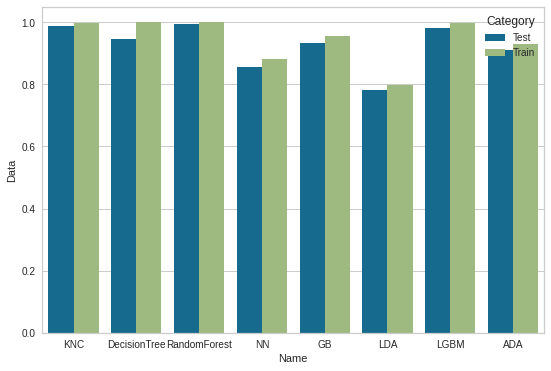

In [79]:
plt.figure(figsize=(9,6))
data1 = {'Name': names2,
         'Data': data,
         'Category': ['Test', 'Train'] * 8}
df2 = pd.DataFrame(data1)
df2
sns.barplot(x='Name',y ='Data', data=df2, hue='Category')

In [80]:
df2

,Name,Data,Category
0,KNC,0.987988,Test
1,KNC,0.997881,Train
2,DecisionTree,0.944453,Test
3,DecisionTree,1.000000,Train
4,RandomForest,0.995029,Test
5,RandomForest,1.000000,Train
6,NN,0.857026,Test
7,NN,0.882551,Train
8,GB,0.934394,Test
9,GB,0.956009,Train


282:	learn: 0.2686393	total: 2.62s	remaining: 157ms
283:	learn: 0.2681384	total: 2.62s	remaining: 148ms
284:	learn: 0.2677177	total: 2.63s	remaining: 139ms
285:	learn: 0.2674811	total: 2.64s	remaining: 129ms
286:	learn: 0.2670786	total: 2.65s	remaining: 120ms
287:	learn: 0.2664747	total: 2.66s	remaining: 111ms
288:	learn: 0.2658380	total: 2.67s	remaining: 102ms
289:	learn: 0.2655558	total: 2.68s	remaining: 92.4ms
290:	learn: 0.2652717	total: 2.69s	remaining: 83.2ms
291:	learn: 0.2646987	total: 2.7s	remaining: 74ms
292:	learn: 0.2643125	total: 2.71s	remaining: 64.7ms
293:	learn: 0.2639174	total: 2.72s	remaining: 55.4ms
294:	learn: 0.2634057	total: 2.73s	remaining: 46.2ms
295:	learn: 0.2630239	total: 2.74s	remaining: 37ms
296:	learn: 0.2626043	total: 2.74s	remaining: 27.7ms
297:	learn: 0.2622953	total: 2.75s	remaining: 18.5ms
298:	learn: 0.2618780	total: 2.76s	remaining: 9.24ms
299:	learn: 0.2614382	total: 2.77s	remaining: 0us
143:	learn: 0.3330683	total: 1.33s	remaining: 1.44s
144:	lear

<AxesSubplot:xlabel='Name', ylabel='Data'>

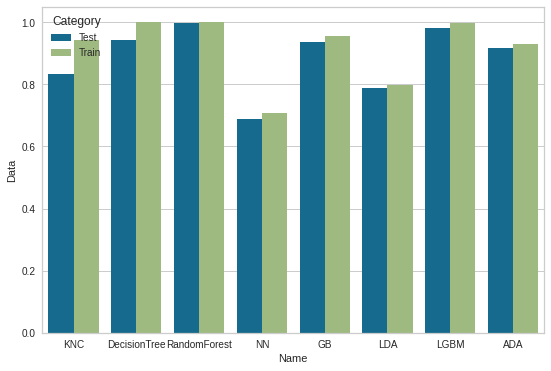

In [70]:
#plt.figure(figsize=(9,6))
#data1 = {'Name': names2,
         #'Data': data,
         #'Category': ['Test', 'Train'] * 8}
#df2 = pd.DataFrame(data1)
#df2
#sns.barplot(x='Name',y ='Data', data=df2, hue='Category')

In [71]:
#df2 results without feature selection and RFECV

,Name,Data,Category
0,KNC,0.833301,Test
1,KNC,0.941764,Train
2,DecisionTree,0.943928,Test
3,DecisionTree,1.000000,Train
4,RandomForest,0.996838,Test
5,RandomForest,1.000000,Train
6,NN,0.688267,Test
7,NN,0.708715,Train
8,GB,0.936139,Test
9,GB,0.954942,Train


# 8. Result Presentation #

 In 6. Algorithm Evaluation the best results were presented by SVC, and the worst by Logistic Regression, bearing in mind that all financial institutions adhere to the rule of using  models which be builted from predictive modeling tools and must be sufficiently interpretable to provide a reason for any adverse actions (rejections). A suitable option is to include other non-interpretable models in the general model. 
 
 We also found that all boosting models without any additional tuning and settings of hyperparameters performed better than Logistic Regression.

The poor performance of the neural network can be due to several factors: 

a) small dataset 

b) default hyperparameters without tuning. 



Random Forest model gives best results with default settings without tuning that's sounds good, because it's easy interpretability. This interpretability is given by that fact that it is straightforward to derive the importance of each variable on the tree decision. in other words, it is easy to compute how much each variable is contributing to the decision.

# 9. Resources #

https://www.kaggle.com/code/aayush7kumar/clustering-using-k-means-hierarchical-and-dbscan/notebook,

https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0#aed2,

https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/,

https://machinelearningmastery.com/rfe-feature-selection-in-python/,

https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier,

https://www.projectpro.io/recipes/find-optimal-parameters-for-catboost-using-gridsearchcv-for-classification,

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html,

https://www.kaggle.com/datasets/ajay1735/hmeq-data,

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html,

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html